In [1]:
import pandas as pd # type: ignore
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import warnings
import joblib
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
df = pd.read_excel("D:\\far_pro\\balanced_data.xlsx")
df

,Destination Port,Flow Duration,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,Bwd Packets/s,Average Packet Size,Label
0,80,5473398,0.000000,0.000000,1.824466e+06,0.182702,0.000,Brute Force
1,80,5733848,0.000000,0.000000,1.911283e+06,0.174403,0.000,Brute Force
2,80,5006190,0.000000,0.000000,1.668730e+06,0.199753,0.000,Brute Force
3,80,5119287,0.000000,0.000000,1.706429e+06,0.195340,0.000,Brute Force
4,80,5767254,0.000000,0.000000,1.922418e+06,0.173393,0.000,Brute Force
...,...,...,...,...,...,...,...,...
8995,22,76,0.000000,0.000000,7.600000e+01,13157.894740,0.000,SSH-Patator
8996,22,40,0.000000,0.000000,4.000000e+01,25000.000000,0.000,SSH-Patator
8997,22,12393416,87.304348,83.181818,2.253348e+05,2.662704,84.875,SSH-Patator
8998,22,43,0.000000,0.000000,4.300000e+01,23255.813950,0.000,SSH-Patator


In [4]:
df['Label'].value_counts()

Label
Brute Force    1500
DDoS           1500
FTP-Patator    1500
Good           1500
PortScan       1500
SSH-Patator    1500
Name: count, dtype: int64

In [3]:
# Data Preprocessing
df2 = df.drop(columns=['Label'])
numeric_columns = ['Destination Port' ,'Flow Duration' ,'Fwd Packet Length Mean' ,'Bwd Packet Length Mean'  ,'Flow IAT Mean' ,'Bwd Packets/s' ,'Average Packet Size']
scaler = MinMaxScaler()
df2[numeric_columns] = scaler.fit_transform(df2[numeric_columns])

In [4]:
# Features and target
x = df2
y = df['Label']

In [5]:
# Label Encoding for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [6]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.1, random_state=42)

In [7]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=11)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_smote, y_train_smote) # Changed 'x_train_somte' to 'x_train_smote'
#best_model = model.best_estimator_ # This line is likely incorrect as RandomForestClassifier doesn't have best_estimator_
# To get the best model you'd typically use GridSearchCV or RandomizedSearchCV
# Example with GridSearchCV
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators': [50, 100, 200]} # Example hyperparameter grid
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(x_train_smote, y_train_smote) # Changed 'x_train_somte' to 'x_train_smote'
# best_model = grid_search.best_estimator_

RandomForestClassifier(random_state=42)

In [10]:
# Model evaluation on the training data
train_score = model.score(x_train_smote, y_train_smote)
print(f"Training Score (Accuracy): {train_score}")

Training Score (Accuracy): 1.0


In [11]:
# Predictions on the test data
y_pred = model.predict(x_test)

Test Accuracy: 0.9966666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       152
           1       1.00      1.00      1.00       164
           2       1.00      1.00      1.00       129
           3       1.00      0.98      0.99       153
           4       0.99      1.00      1.00       156
           5       1.00      1.00      1.00       146

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

Confusion Matrix:
 [[152   0   0   0   0   0]
 [  0 164   0   0   0   0]
 [  0   0 129   0   0   0]
 [  2   0   0 150   1   0]
 [  0   0   0   0 156   0]
 [  0   0   0   0   0 146]]


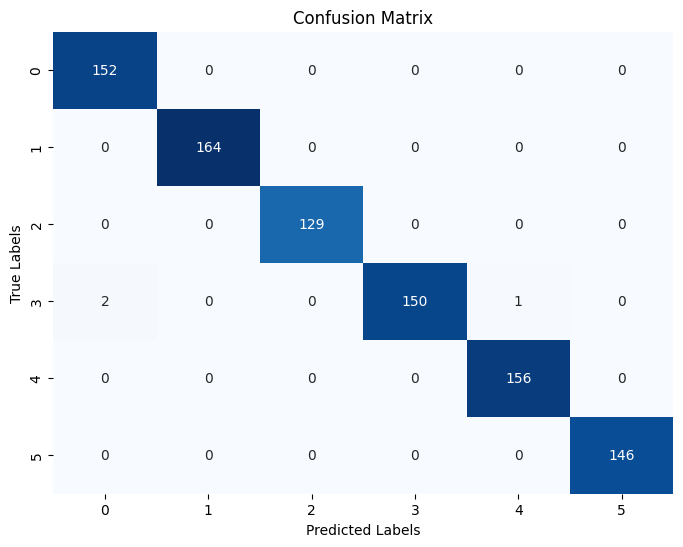

In [12]:
# Model evaluation on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
y_pred == model.predict(x_test)
y_true = y_test
# إنشاء Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# رسم Confusion Matrix باستخدام Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

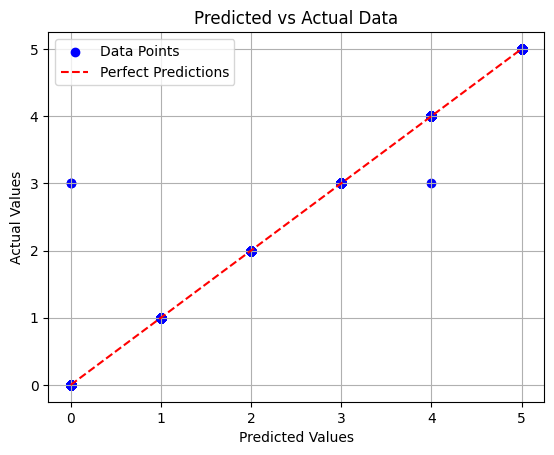

In [15]:
# Plot Predicted vs Actual Data
plt.scatter(y_pred, y_test, color='blue', label='Data Points')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Save the file for Scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Save the file for Label Encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
# Save the model
joblib.dump(model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [14]:

result_array = model.predict([[0.000336,	1.135773e-01,	0.048766,	0.021511,	3.938485e-03,	2.421909e-06,	0.044595]])

# الحصول على درجة التصنيف (الاحتمالية)
probability_array = model.predict_proba([[0.000336,	1.135773e-01,	0.048766,	0.021511,	3.938485e-03,	2.421909e-06,	0.044595]])

# تحويل التنبؤ إلى المحصول باستخدام Label Encoder
result = label_encoder.inverse_transform([result_array[0]])

# طباعة النتيجة مع درجة التصنيف
print(f"Predicted Crop: {result[0]}, Probability: {probability_array[0][result_array[0]]:.2f}")

Predicted Crop: SSH-Patator, Probability: 1.00


In [16]:
x_test

,Destination Port,Flow Duration,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,Bwd Packets/s,Average Packet Size
7940,0.000336,1.135773e-01,0.048766,0.021511,3.938485e-03,2.421909e-06,0.044595
1162,0.001221,4.413217e-02,0.000000,0.000000,2.754643e-02,1.888775e-07,0.000000
582,0.001221,4.181808e-02,0.000000,0.000000,2.610202e-02,1.993294e-07,0.000000
4081,0.000321,8.777317e-02,0.006233,0.003241,7.146037e-03,1.424508e-06,0.006300
8412,0.000336,9.991303e-02,0.048766,0.022183,3.530024e-03,2.669705e-06,0.045421
...,...,...,...,...,...,...,...
6486,0.023399,4.501209e-07,0.000000,0.001552,8.428698e-07,1.851852e-02,0.001548
4506,0.000809,4.544137e-04,0.023509,0.027670,1.701817e-04,3.668715e-05,0.037327
1770,0.001221,3.849842e-03,0.004630,0.500259,9.011234e-04,1.299103e-05,0.667011
1688,0.001221,1.028715e-02,0.004630,0.500259,2.407890e-03,4.861736e-06,0.667011
